In [2]:
%matplotlib inline
import numpy as np
from scipy import stats
from numpy import tan, arctan, sqrt, cos, sin, arccos
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from scipy.ndimage.filters import gaussian_filter
import matplotlib.ticker as ticker

def solve(f, E0, e, h):
    from numpy import cos
    lastE = E0
    nextE = lastE + 10* h  # "different than lastX so loop starts OK
    number=0
    while (abs(lastE - nextE) > h) and number < 1001:  # this is how you terminate the loop 
        newY = f(nextE,e,E0) # just for debug... see what happens
        #print "f(", nextE, ") = ", newY     # print out progress... again just debug
        lastE = nextE
        nextE = lastE - newY / (1.-e*cos(lastE))  # update estimate using N-R
        number=number+1
        if number >= 1000:
            nextE = float('NaN')
    return nextE

def eccentricity_anomaly(E,e,M):
    return E - (e*sin(E)) - M

def get_levels(c):
    Hflat = c.flatten()
    inds = np.argsort(Hflat)[::-1]
    Hflat = Hflat[inds]
    sm = np.cumsum(Hflat)
    sm /= sm[-1]
    V = np.zeros(len(levels))
    for i, v0 in enumerate(levels):
        try:
            V[i] = Hflat[sm <= v0][-1]
        except:
            V[i] = Hflat[0]
    V.sort()
    return V

In [3]:
# Results in:
dat_in = np.loadtxt(open('GSC6214_ofti_output_2018_07_09/GSC6214_accepted',"rb"),delimiter='   ',ndmin=2)

a,T,to,e,i_deg,w_deg,O_deg,m1,dist=dat_in[:,0],dat_in[:,1],dat_in[:,2],dat_in[:,3],dat_in[:,4],dat_in[:,5],dat_in[:,6]%360,dat_in[:,7],dat_in[:,8]
c,A,dice = dat_in[:,9],dat_in[:,10],dat_in[:,11]
i,w,O = np.radians(i_deg),np.radians(w_deg),np.radians(O_deg)
print a.shape
dates = np.array([2008.46,2009.41,2010.40,2011.42,2014.58,2016.46,2017.49])

d=np.mean(dist)
a_au=a*d
chi_min = np.where(c==np.min(c))

# Periastron calc in:
q = np.loadtxt(open("GSC6214_ofti_output_2018_07_09/GSC6214_accepted_periastron","rb"),delimiter='   ',ndmin=2)
periast=q[:,0]
periastron = periast[~np.isnan(periast)]

dat = dat_in[~np.isnan(periast)]

periastron = (1.-e)*a_au

(97851,)


In [4]:
# Clip data if necessary
dat5 = dat[0:100007]
# Reinitialize variables
a5,T5,to5,e5,i5_deg,w5_deg,O5_deg= dat5[:,0],dat5[:,1],dat5[:,2],\
    dat5[:,3],dat5[:,4],dat5[:,5],dat5[:,6]%360
i5,w5,O5=np.radians(i5_deg),np.radians(w5_deg),np.radians(O5_deg)
a_au5 = a5*np.mean(dist)

# Clip data if necessary:
# Remove semi-major axis greater than some AU:
vv = np.where(a_au5>450)
vv=vv[0]
dat5 = np.delete(dat5,vv,axis=0)
peri5 = np.delete(periastron,vv,axis=0)

a5,T5,to5,e5,i5_deg,w5_deg,O5_deg= dat5[:,0],dat5[:,1],dat5[:,2],\
    dat5[:,3],dat5[:,4],dat5[:,5],dat5[:,6]%360
i5,w5,O5=np.radians(i5_deg),np.radians(w5_deg),np.radians(O5_deg)

print a5.shape
print peri5.shape


a_au5 = a5*np.mean(dist)
O5_deg = O5_deg
#w5_deg = w5_deg%180
i5,w5,O5=np.radians(i5_deg),np.radians(w5_deg),np.radians(O5_deg)
a_au5 = a5*np.mean(dist)
peri5 = (1.-e5)*a_au5
print peri5.shape

(79840,)
(79842,)
(79840,)


### Limiting $\Omega$ (and consquently adjusting $\omega$ ) to 0-180 deg:

<IPython.core.display.Javascript object>


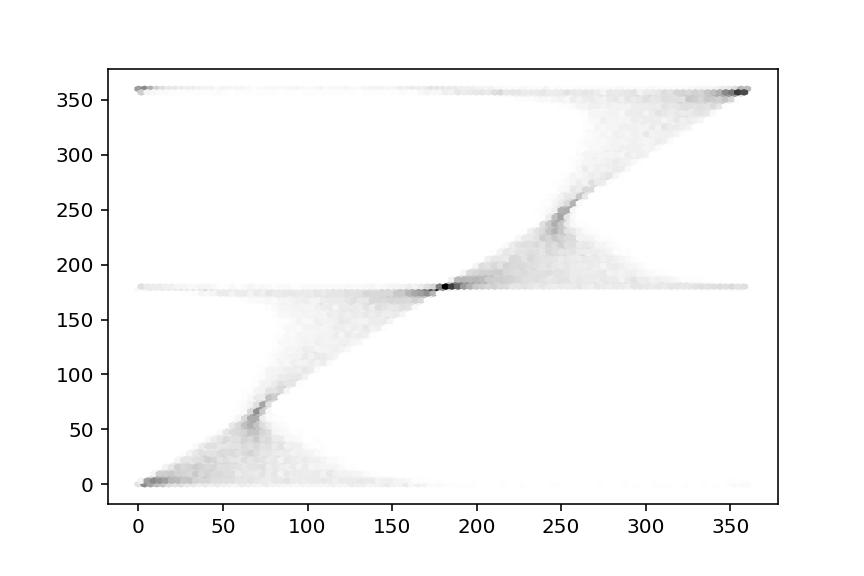

In [5]:
%matplotlib notebook
plt.hexbin(w5_deg,O5_deg,bins=100,cmap='binary')
plt.show()

In [6]:
# Adjusting Omega/omega:
ind = np.where(O5_deg>180)[0]
print O5_deg[ind],w5_deg[ind]
print w5_deg[np.where(w5_deg[ind]<180)[0]]

O5_deg[ind] = (O5_deg[ind]+180)%360
w5_deg[ind] = (w5_deg[ind]+180)%360
print O5_deg[ind],w5_deg[ind]

[193.53052955 193.71435683 325.66326604 ... 244.82849736 355.36313682
 209.82241915] [270.4836787  215.53618413 277.34335344 ... 251.59783251 296.64521269
 245.44236094]
[124.75351783 254.96762594 205.0298054  ... 224.09295695 112.9488251
 241.80170399]
[ 13.53052955  13.71435683 145.66326604 ...  64.82849736 175.36313682
  29.82241915] [ 90.4836787   35.53618413  97.34335344 ...  71.59783251 116.64521269
  65.44236094]


In [7]:
# Adjusting Omega/omega:
ind = np.where(O_deg>180)[0]
print O_deg[ind],w_deg[ind]
print w_deg[np.where(w_deg[ind]<180)[0]]

O_deg[ind] = (O_deg[ind]+180)%360
w_deg[ind] = (w_deg[ind]+180)%360
print O_deg[ind],w_deg[ind]

[193.53052955 193.71435683 212.41419878 ... 355.36313682 241.63018176
 209.82241915] [270.4836787  215.53618413 324.3316753  ... 296.64521269 222.04023464
 245.44236094]
[ 15.7701153  124.75351783  70.52526777 ... 129.14666348 339.82496625
 116.85870857]
[ 13.53052955  13.71435683  32.41419878 ... 175.36313682  61.63018176
  29.82241915] [ 90.4836787   35.53618413 144.3316753  ... 116.64521269  42.04023464
  65.44236094]


<IPython.core.display.Javascript object>


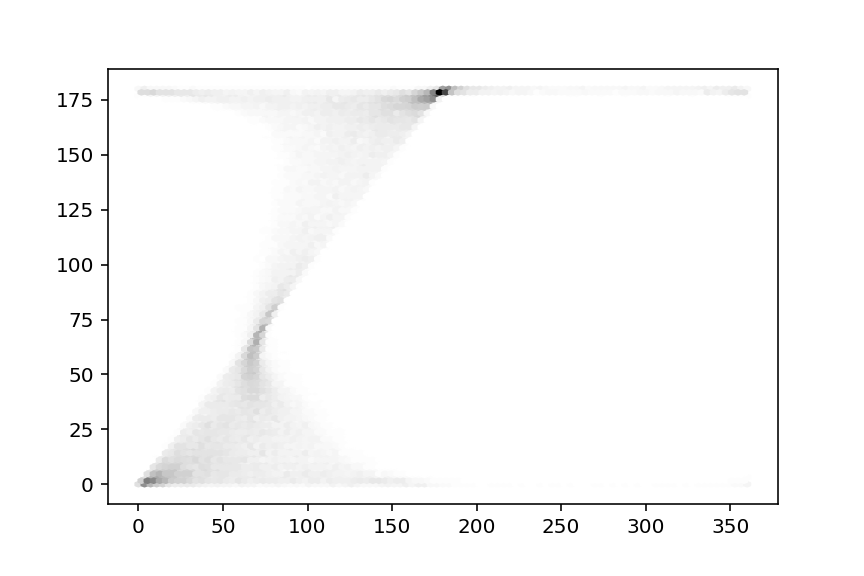

In [8]:
%matplotlib notebook
plt.hexbin(w5_deg,O5_deg,bins=100,cmap='binary')
plt.show()

<IPython.core.display.Javascript object>


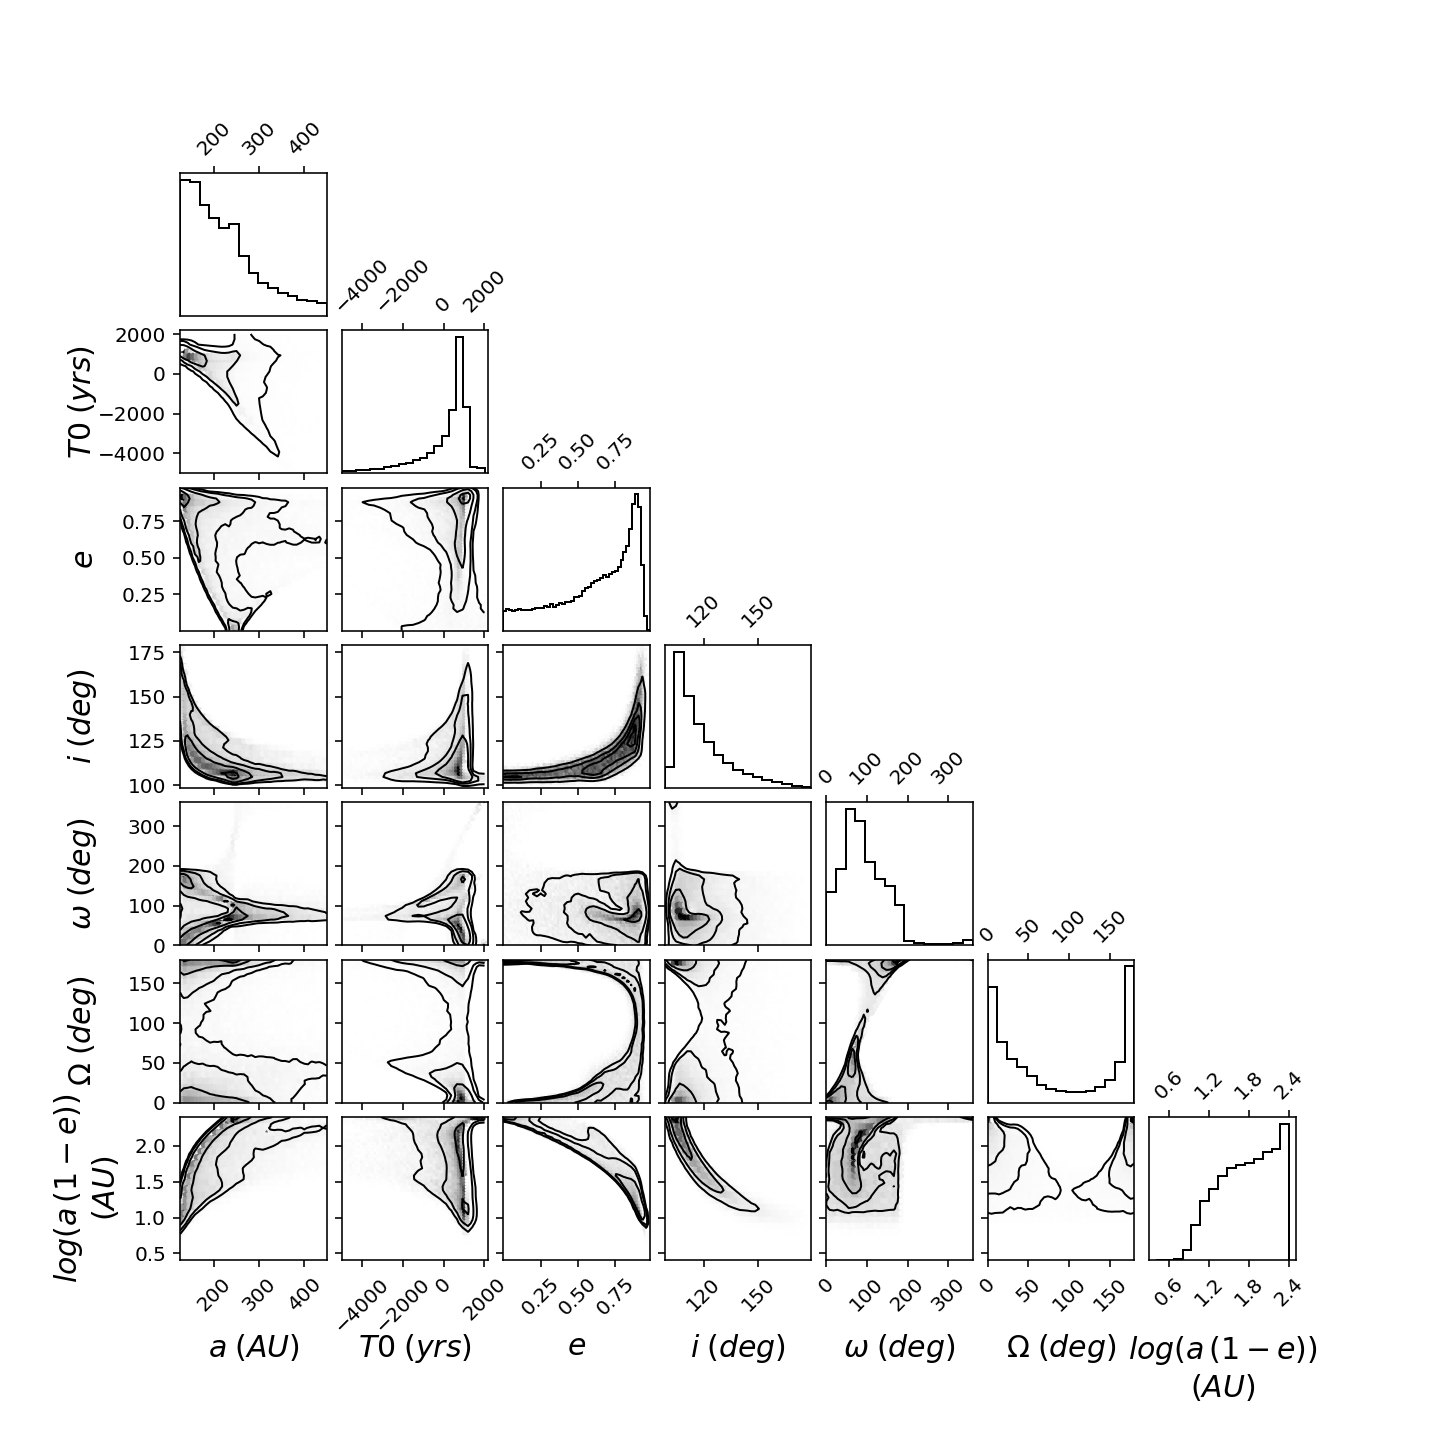

In [11]:
# Determine sigma levels:
levels = 1.0 - np.exp(-0.5 * np.arange(0.5, 2.1, 0.5) ** 2)
# Default color cycle:
#prop_cycle = plt.rcParams['axes.prop_cycle']
#colors = prop_cycle.by_key()['color']
colors=['black','black','black','black']
#cmap = 'cubehelix_r'
cmap = 'binary'
tick_fs = 10
label_fs = 15
contour_lw = 1
contours = True
# Controls amount of smoothing:
sigma = 0.7
# Set axis label coords to line up and control placement of axis labels:
label_x_x,label_x_y= 0.5,-0.5
label_y_x,label_y_y= -0.55,0.5

%matplotlib notebook
plt.figure(figsize=(10, 10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.1)

# Plot 1-d hist:
ax1 = plt.subplot2grid((7,7), (0,0))
plt.hist(a_au5,bins=15,facecolor="None",edgecolor='black',histtype='step')
plt.tick_params(axis='both', left='off', top='on', right='off', bottom='off', \
                labelleft='off', labeltop='on', labelright='off', labelbottom='off', labelsize = tick_fs)
plt.xticks(rotation=45)
#plt.title(r"${{{0}}}={{{1}}}_{{-{2}}}^{{+{3}}}$".format('a',np.round(np.mean(a_au5),decimals=2),\
#                                                 np.round(np.std(a_au5),decimals=2), 
#                                                 np.round(np.std(a_au5),decimals=2)),fontsize='10')
########## Plot 2-d hists:
### First column:
ax2 = plt.subplot2grid((7,7), (1,0),sharex=ax1)
x,y = a_au5,to5
plt.hexbin(x,y,gridsize=40,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
ax2.yaxis.set_major_locator(ticker.MaxNLocator(4,prune="upper"))
plt.ylabel(r"$T0 \; (yrs)$",fontsize=label_fs)
ax2.get_yaxis().set_label_coords(label_y_x,label_y_y)
plt.tick_params(axis='x', labelleft='on',labeltop='off', labelright='off', labelbottom='off', labelsize=tick_fs)
plt.ylim(-5000,2200)

ax3 = plt.subplot2grid((7,7), (2,0),sharex=ax1)
x,y = a_au5,e5
plt.hexbin(x,y,gridsize=40,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
ax3.yaxis.set_major_locator(ticker.MaxNLocator(4,prune="both"))
ax3.get_yaxis().set_label_coords(label_y_x,label_y_y)
plt.ylabel(r"$e$",fontsize=label_fs)
#ax3.set_ylim(-8000,1000)
plt.tick_params(axis='x', labeltop='off', labelright='off', labelbottom='off',labelsize=tick_fs)

ax4 = plt.subplot2grid((7,7), (3,0),sharex=ax1)
x,y = a_au5,i5_deg
plt.hexbin(x,y,gridsize=40,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
ax4.yaxis.set_major_locator(ticker.MaxNLocator(4,prune="upper"))
ax4.get_yaxis().set_label_coords(label_y_x,label_y_y)
plt.ylabel(r"$i \; (deg)$",fontsize=label_fs)
plt.tick_params(axis='x', labeltop='off', labelright='off', labelbottom='off',labelsize=tick_fs)

ax5 = plt.subplot2grid((7,7), (4,0),sharex=ax1)
x,y = a_au5,w5_deg
plt.hexbin(x,y,gridsize=40,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
ax5.yaxis.set_major_locator(ticker.MaxNLocator(4,prune="upper"))
plt.ylabel(r"$\omega \; (deg)$",fontsize=label_fs)
ax5.get_yaxis().set_label_coords(label_y_x,label_y_y)
plt.tick_params(axis='x', labeltop='off', labelright='off', labelbottom='off',labelsize=tick_fs)

ax6 = plt.subplot2grid((7,7), (5,0),sharex=ax1)
x,y = a_au5,O5_deg
plt.hexbin(x,y,gridsize=40,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
ax6.yaxis.set_major_locator(ticker.MaxNLocator(4,prune="upper"))
plt.ylabel(r"$\Omega \; (deg)$",fontsize=label_fs)
ax6.get_yaxis().set_label_coords(label_y_x,label_y_y)
plt.tick_params(axis='x', labeltop='off', labelright='off', labelbottom='off',labelsize=tick_fs)

ax7 = plt.subplot2grid((7,7), (6,0),sharex=ax1)
x,y = a_au5,np.log10(peri5)
plt.hexbin(x,y,gridsize=40,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
ax7.yaxis.set_major_locator(ticker.MaxNLocator(4,prune="both"))
ax7.xaxis.set_major_locator(ticker.MaxNLocator(4,prune="upper"))
plt.xticks(rotation=45)
plt.tick_params(axis='both', which='major', labelsize=tick_fs)
plt.ylabel(r"$log(a\,(1-e))$"+"\n"+ r"$(AU)$", fontsize=label_fs)
plt.xlabel(r"$a \; (AU)$",fontsize=label_fs)
ax7.get_xaxis().set_label_coords(label_x_x,label_x_y)
ax7.get_yaxis().set_label_coords(label_y_x+0.15,label_y_y)

####################################### Second column:
# 1-d hist:
ax8 = plt.subplot2grid((7,7), (1,1))
plt.hist(to5,bins=30,facecolor="None",edgecolor='black',histtype='step')
plt.tick_params(axis='both', left='off', top='on', right='off', bottom='off', \
                labelleft='off', labeltop='on', labelright='off', labelbottom='off', labelsize = tick_fs)
plt.xticks(rotation=45)
plt.xlim(-5000,2200)
#plt.title(r"${{{0}}}={{{1}}}_{{-{2}}}^{{+{3}}}$".format('T',np.round(np.mean(T),decimals=2),\
#                                                 np.round(np.std(T),decimals=2), 
#                                                 np.round(np.std(T),decimals=2)),fontsize='10')
# 2-d hists:
ax9 = plt.subplot2grid((7,7), (2,1),sharex=ax8,sharey=ax3)
x,y = to5,e5
plt.hexbin(x,y,gridsize=80,cmap=cmap,mincnt=1)
#plt.ylim(-8000,1000)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
plt.tick_params(axis='both',labelleft='off', labeltop='off', labelright='off', labelbottom='off')
plt.xlim(-5000,2200)

ax10 = plt.subplot2grid((7,7), (3,1),sharex=ax8,sharey=ax4)
x,y = to5,i5_deg
plt.hexbin(x,y,gridsize=80,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
plt.tick_params(axis='both',labelleft='off', labeltop='off', labelright='off', labelbottom='off')
plt.xlim(-5000,2200)

ax11 = plt.subplot2grid((7,7), (4,1),sharex=ax8,sharey=ax5)
x,y = to5,w5_deg
plt.hexbin(x,y,gridsize=80,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
plt.tick_params(axis='both',labelleft='off', labeltop='off', labelright='off', labelbottom='off')
plt.xlim(-5000,2200)

ax12 = plt.subplot2grid((7,7), (5,1),sharex=ax8,sharey=ax6)
x,y = to5,O5_deg
plt.hexbin(x,y,gridsize=80,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
plt.tick_params(axis='both',labelleft='off', labeltop='off', labelright='off', labelbottom='off')
plt.xlim(-5000,2200)

ax13 = plt.subplot2grid((7,7), (6,1),sharex=ax8,sharey=ax7)
x,y = to5,np.log10(peri5)
plt.hexbin(x,y,gridsize=80,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
plt.tick_params(axis='y',labelleft='off', labeltop='off', labelright='off')#,direction='vertical'
ax13.xaxis.set_major_locator(ticker.MaxNLocator(4,prune="upper"))
plt.xlim(-5000,2200)
plt.xticks(rotation=45)
plt.tick_params(axis='both', which='major', labelsize=tick_fs)
#plt.xlim(0,250)
plt.xlabel(r"$T0 \; (yrs)$",fontsize=label_fs)
ax13.get_xaxis().set_label_coords(label_x_x,label_x_y)

######################################### Third column:
# 1-d hist:
ax14 = plt.subplot2grid((7,7), (2,2))
plt.hist(e5,bins=50,facecolor="None",edgecolor='black',histtype='step')
plt.tick_params(axis='both', left='off', top='on', right='off', bottom='off', \
                labelleft='off', labeltop='on', labelright='off', labelbottom='off', labelsize = tick_fs)
plt.xticks(rotation=45)
#plt.title(r"${{{0}}}={{{1}}}_{{-{2}}}^{{+{3}}}$".format('to',np.round(np.mean(to),decimals=2),\
#                                                 np.round(np.std(to),decimals=2), 
#                                                 np.round(np.std(to),decimals=2)),fontsize='10')
# 2-d hists:
ax15 =plt.subplot2grid((7,7), (3,2),sharex=ax14,sharey=ax10)
x,y = e5,i5_deg
plt.hexbin(x,y,gridsize=80,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
plt.tick_params(axis='both',labelleft='off', labeltop='off', labelright='off', labelbottom='off')

ax16 =plt.subplot2grid((7,7), (4,2),sharex=ax14,sharey=ax11)
x,y = e5,w5_deg
plt.hexbin(x,y,gridsize=80,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
plt.tick_params(axis='both',labelleft='off', labeltop='off', labelright='off', labelbottom='off')

ax17 =plt.subplot2grid((7,7), (5,2),sharex=ax14,sharey=ax12)
x,y = e5,O5_deg
plt.hexbin(x,y,gridsize=80,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
plt.tick_params(axis='both',labelleft='off', labeltop='off', labelright='off', labelbottom='off')

ax18 =plt.subplot2grid((7,7), (6,2),sharex=ax14,sharey=ax13)
x,y = e5,np.log10(peri5)
plt.hexbin(x,y,gridsize=80,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
plt.tick_params(axis='y',labelleft='off', labeltop='off', labelright='off')
#ax18.xaxis.set_major_locator(ticker.MaxNLocator(4,prune="upper"))
ax18.xaxis.set_major_locator(ticker.MaxNLocator(4,prune="both"))
plt.xticks(rotation=45)
plt.tick_params(axis='both', which='major', labelsize=tick_fs)
#plt.ylim(-8000,1000)
plt.xlabel(r"$e$",fontsize=label_fs)
ax18.get_xaxis().set_label_coords(label_x_x,label_x_y)

#################################### Fourth column
# 1-d hist:
ax19 = plt.subplot2grid((7,7), (3,3))
plt.hist(i5_deg,bins=15,facecolor="None",edgecolor='black',histtype='step')
plt.tick_params(axis='both', left='off', top='on', right='off', bottom='off', \
                labelleft='off', labeltop='on', labelright='off', labelbottom='off', labelsize = tick_fs)
plt.xticks(rotation=45)
#plt.title(r"${{{0}}}={{{1}}}_{{-{2}}}^{{+{3}}}$".format('e',np.round(np.mean(e),decimals=2),\
#                                                 np.round(np.std(e),decimals=2), 
#                                                 np.round(np.std(e),decimals=2)),fontsize='10')
# 2-d hists:
ax20 = plt.subplot2grid((7,7), (4,3),sharex=ax19,sharey=ax16)
x,y = i5_deg,w5_deg
plt.hexbin(x,y,gridsize=40,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
plt.tick_params(axis='both',labelleft='off', labeltop='off', labelright='off', labelbottom='off')

ax21 = plt.subplot2grid((7,7), (5,3),sharex=ax19,sharey=ax17)
x,y = i5_deg,O5_deg
plt.hexbin(x,y,gridsize=40,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
plt.tick_params(axis='both',labelleft='off', labeltop='off', labelright='off', labelbottom='off')

ax22 = plt.subplot2grid((7,7), (6,3),sharex=ax19,sharey=ax18)
x,y = i5_deg,np.log10(peri5)
plt.hexbin(x,y,gridsize=40,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
plt.tick_params(axis='y',labelleft='off', labeltop='off', labelright='off')
ax22.xaxis.set_major_locator(ticker.MaxNLocator(3,prune="upper"))
plt.xticks(rotation=45)
plt.tick_params(axis='both', which='major', labelsize=tick_fs)
plt.xlabel(r"$i \; (deg)$",fontsize=label_fs)
ax22.get_xaxis().set_label_coords(label_x_x,label_x_y)

##################################### Fifth column
# 1-d hist:
ax23 = plt.subplot2grid((7,7), (4,4))
plt.tick_params(axis='x',labelleft='off', labeltop='on', labelright='off')
plt.hist(w5_deg,bins=15,facecolor="None",edgecolor='black',histtype='step')
plt.tick_params(axis='both', left='off', top='on', right='off', bottom='off', \
                labelleft='off', labeltop='on', labelright='off', labelbottom='off', labelsize = tick_fs)
plt.xticks(rotation=45)
#plt.title(r"${{{0}}}={{{1}}}_{{-{2}}}^{{+{3}}}$".format('i',np.round(np.mean(i),decimals=2),\
#                                                 np.round(np.std(i),decimals=2), \
#                                                 np.round(np.std(i),decimals=2)),fontsize='10')
# 2-d hists:
ax24 = plt.subplot2grid((7,7), (5,4),sharex=ax23,sharey=ax21)
x,y = w5_deg,O5_deg
plt.hexbin(x,y,gridsize=40,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
plt.tick_params(axis='both',labelleft='off', labeltop='off', labelright='off', labelbottom='off')

ax25 = plt.subplot2grid((7,7), (6,4),sharex=ax23,sharey=ax22)
x,y = w5_deg,np.log10(peri5)
plt.hexbin(x,y,gridsize=40,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
plt.tick_params(axis='y',labelleft='off', labeltop='off', labelright='off')
ax25.xaxis.set_major_locator(ticker.MaxNLocator(4,prune="upper"))
plt.xticks(rotation=45)
plt.tick_params(axis='both', which='major', labelsize=tick_fs)
plt.xlabel(r"$\omega \; (deg)$",fontsize=label_fs)
ax25.get_xaxis().set_label_coords(label_x_x,label_x_y)

################################# 6th column
ax26 = plt.subplot2grid((7,7), (5,5))
plt.hist(O5_deg,bins=15,facecolor="None",edgecolor='black',histtype='step')
plt.tick_params(axis='both', left='off', top='on', right='off', bottom='off', \
                labelleft='off', labeltop='on', labelright='off', labelbottom='off', labelsize = tick_fs)
plt.xticks(rotation=45)
#plt.title(r"${{{0}}}={{{1}}}_{{-{2}}}^{{+{3}}}$".format('w',np.round(np.mean(w),decimals=2),\
#                                                 np.round(np.std(w),decimals=2), \
#                                                 np.round(np.std(w),decimals=2)),fontsize='10')
# 2-d hists:
ax27 = plt.subplot2grid((7,7), (6,5),sharex=ax26,sharey=ax25)
x,y = O5_deg,np.log10(peri5)
plt.hexbin(x,y,gridsize=40,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
plt.tick_params(axis='y',labelleft='off', labeltop='off', labelright='off')
ax27.xaxis.set_major_locator(ticker.MaxNLocator(4,prune="upper"))
plt.xticks(rotation=45)
plt.tick_params(axis='both', which='major', labelsize=tick_fs)
plt.xlabel(r"$\Omega \; (deg)$",fontsize=label_fs)
ax27.get_xaxis().set_label_coords(label_x_x,label_x_y)

############# 7th column
ax28 = plt.subplot2grid((7,7), (6,6))
plt.hist(np.log10(peri5),bins=15,facecolor="None",edgecolor='black',histtype='step')
plt.tick_params(axis='both', left='off', top='on', right='off', bottom='on', \
                labelleft='off', labeltop='on', labelright='off', labelbottom='on', labelsize = tick_fs)
plt.xticks(rotation=45)
#plt.title(r"${{{0}}}={{{1}}}_{{-{2}}}^{{+{3}}}$".format('O',np.round(np.mean(O),decimals=2),\
#                                                 np.round(np.std(O),decimals=2), \
#                                                 np.round(np.std(O),decimals=2)),fontsize='10')
ax28.xaxis.set_major_locator(ticker.MaxNLocator(4,prune="upper"))
plt.xticks(rotation=45)
plt.xlabel(r"$log(a\,(1-e))$"+"\n"+ r"$(AU)$",fontsize=label_fs)
ax28.get_xaxis().set_label_coords(label_x_x,label_x_y)


plt.show()
plt.savefig("GSC6214_ofti_output_2018_07_09/GSC6214_mycorner_omega_limit.pdf", format='pdf')

# Single 2-d corner plot

<IPython.core.display.Javascript object>


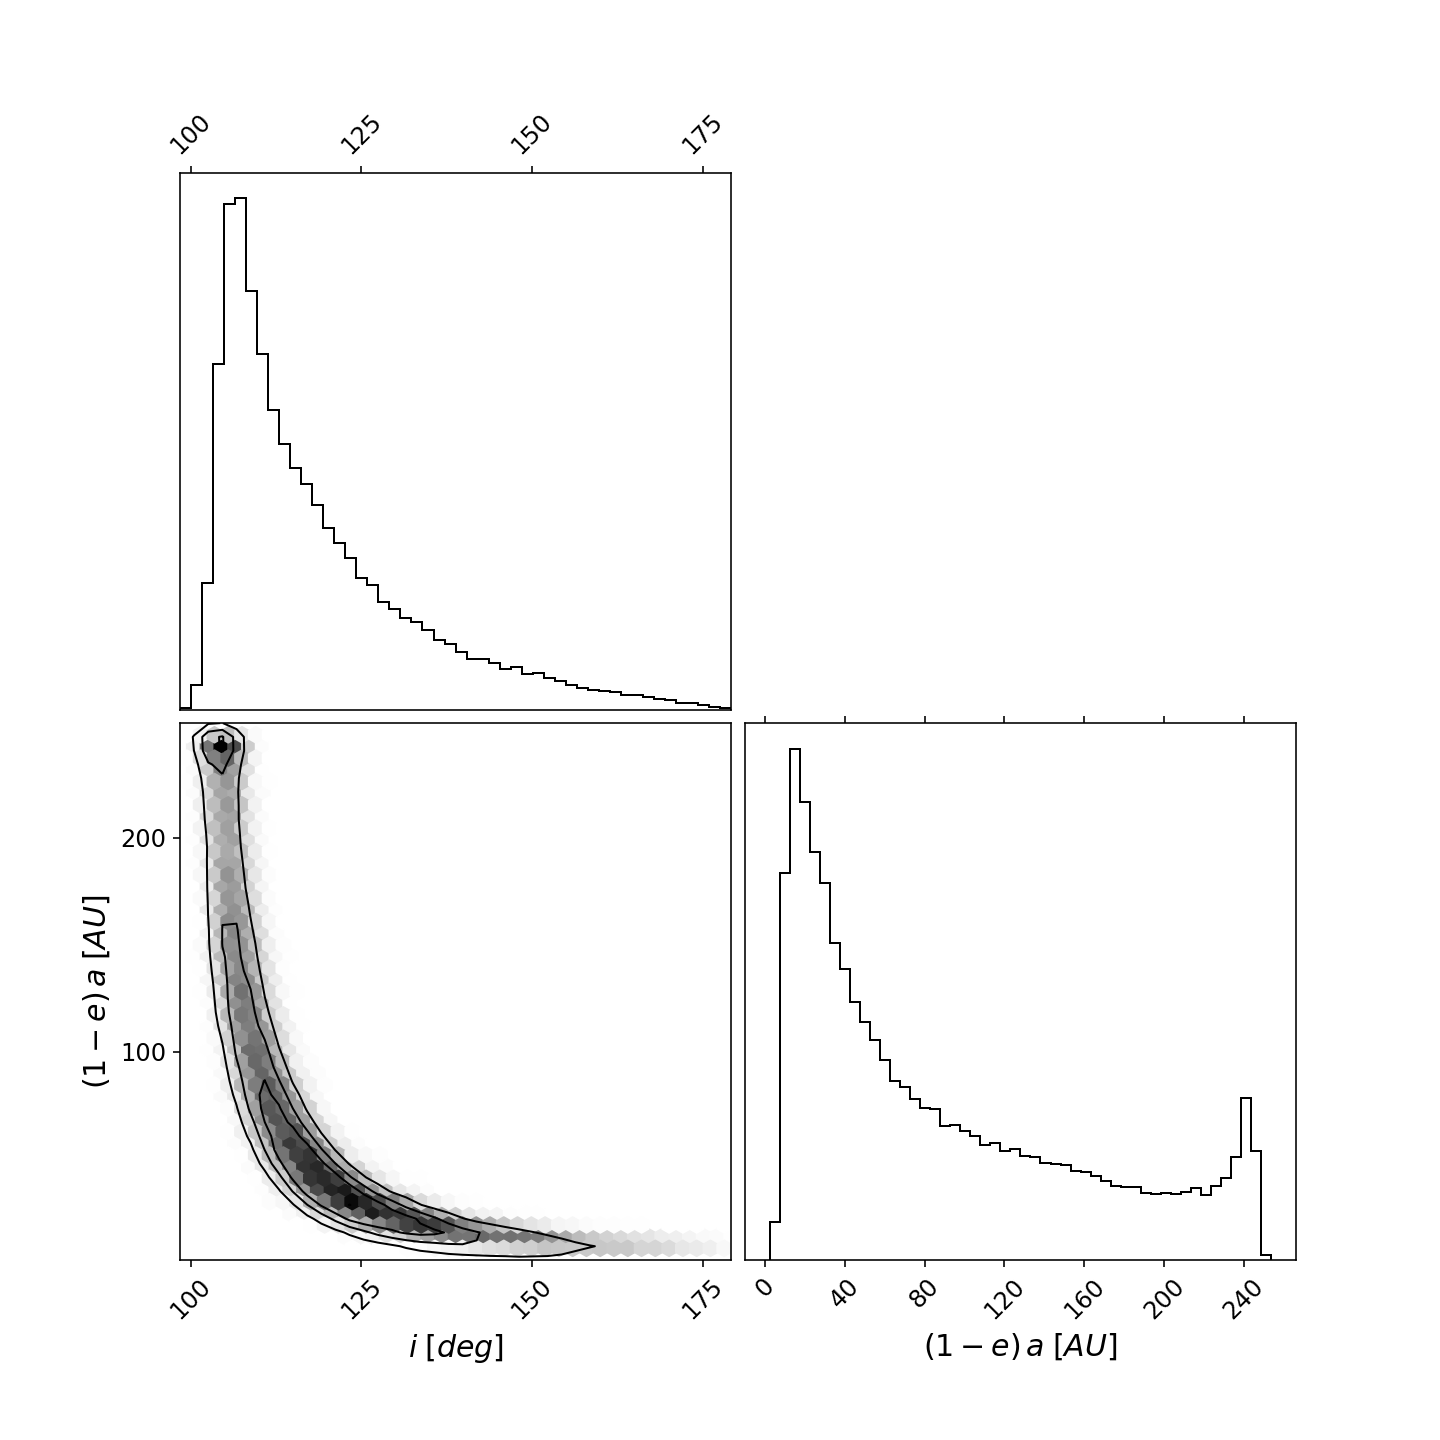

In [14]:
# Determine sigma levels:
levels = 1.0 - np.exp(-0.5 * np.arange(0.5, 2.1, 0.5) ** 2)
# Default color cycle:
#prop_cycle = plt.rcParams['axes.prop_cycle']
#colors = prop_cycle.by_key()['color']
colors=['black','black','black','black']
cmap = 'cubehelix_r'
cmap = 'binary'
tick_fs = 12
label_fs = 15
contour_lw = 1
contours = True
# Controls amount of smoothing:
sigma = 0.7
# Bin size fo 1d hists:
binsx=50
binsy=50
# Bin size for 2d hist:
binsxy = 40

################## Variables to plot #######################
x,y = i5_deg,peri5
xlabel = r"$i \; [deg]$"
ylabel = r"$(1-e)\,a \; [AU]$"
output_name = "GSC6214_ofti_output_2018_07_09/GSC6214_mycorner_i_peri.png"


%matplotlib notebook
plt.figure(figsize=(10, 10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.025, hspace=0.025)

# Upper 1-d hist:
ax1 = plt.subplot2grid((2,2), (0,0))
plt.hist(x,bins=binsx,facecolor="None",edgecolor='black',histtype='step')
plt.tick_params(axis='both', left='off', top='on', right='off', bottom='off', \
                labelleft='off', labeltop='on', labelright='off', labelbottom='off', labelsize = tick_fs)
plt.xticks(rotation=45)
#plt.title(r"${{{0}}}={{{1}}}_{{-{2}}}^{{+{3}}}$".format('a',np.round(np.mean(a_au5),decimals=2),\
# np.round(np.std(a_au5),decimals=2), 
#                                                 np.round(np.std(a_au5),decimals=2)),fontsize='10')

# 2-d hist:
ax7 = plt.subplot2grid((2,2), (1,0),sharex=ax1)
plt.hexbin(x,y,gridsize=binsxy,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=binsxy, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
ax7.yaxis.set_major_locator(ticker.MaxNLocator(3,prune="upper"))
ax7.xaxis.set_major_locator(ticker.MaxNLocator(4,prune="upper"))
plt.xticks(rotation=45)
plt.tick_params(axis='both', which='major', labelsize=tick_fs)
plt.ylabel(ylabel, fontsize=label_fs)
plt.xlabel(xlabel,fontsize=label_fs)

# Right side 1-d hist:
ax28 = plt.subplot2grid((2,2), (1,1))
plt.hist(y,bins=binsy,facecolor="None",edgecolor='black',histtype='step')
plt.tick_params(axis='both', left='off', top='on', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on', labelsize = tick_fs)
plt.xticks(rotation=45)
plt.xlabel(xlabel,fontsize=label_fs)
#plt.title(r"${{{0}}}={{{1}}}_{{-{2}}}^{{+{3}}}$".format('O',np.round(np.mean(O),decimals=2),\
# np.round(np.std(O),decimals=2), 
#                                                 np.round(np.std(O),decimals=2)),fontsize='10')
ax28.xaxis.set_major_locator(ticker.MaxNLocator(8,prune="upper"))
plt.xticks(rotation=45)
plt.xlabel(ylabel,fontsize=label_fs)

plt.show()
#plt.savefig(output_name, format='png', dpi=300)

## Single 2d plot:

<IPython.core.display.Javascript object>


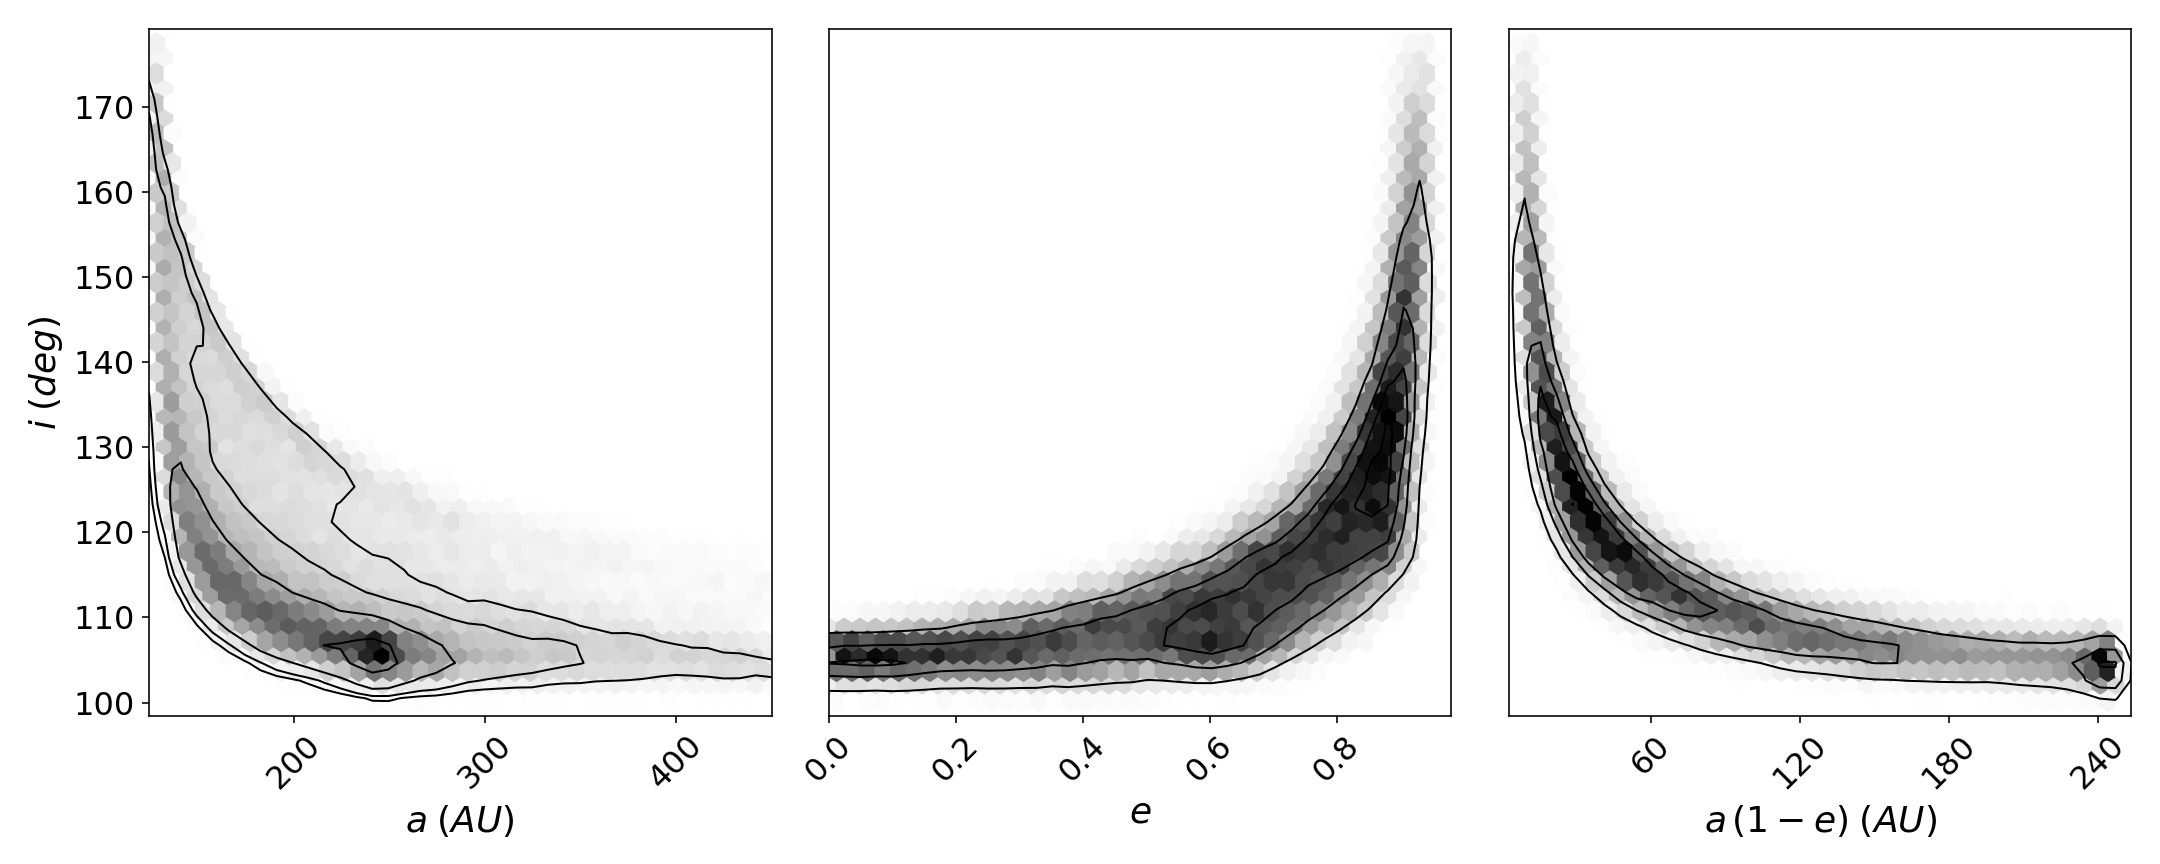

In [21]:
# Determine sigma levels:
levels = 1.0 - np.exp(-0.5 * np.arange(0.5, 2.1, 0.5) ** 2)
# Default color cycle:
#prop_cycle = plt.rcParams['axes.prop_cycle']
#colors = prop_cycle.by_key()['color']
colors=['black','black','black','black']
cmap = 'cubehelix_r'
cmap = 'binary'
tick_fs = 16
label_fs = 18
contour_lw = 1
contours = True
# Controls amount of smoothing:
sigma = 0.7
# Bin size fo 1d hists:
binsx=50
binsy=50
# Bin size for 2d hist:
binsxy = 40

################## Variables to plot #######################
x,y = peri5,i5_deg
ylabel = r"$i \; (deg)$"
xlabel = r"$a\,(1-e) \; (AU)$"
output_name = "GSC6214_ofti_output_2018_07_09/GSC6214_2dcontours_i.pdf"


%matplotlib notebook
plt.figure(figsize=(15, 6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.025, hspace=0.025)

# 2-d hist:
ax7 = plt.subplot2grid((1,3), (0,0))
plt.hexbin(a_au5,i5_deg,gridsize=binsxy,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(a_au5,i5_deg, bins=binsxy, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
ax7.xaxis.set_major_locator(ticker.MaxNLocator(4,prune="upper"))
plt.xticks(rotation=45)
plt.tick_params(axis='both', which='major', labelsize=tick_fs)
plt.ylabel(ylabel, fontsize=label_fs)
plt.xlabel(r"$a \; (AU)$",fontsize=label_fs)

# 2-d hist:
ax8 = plt.subplot2grid((1,3), (0,1),sharey=ax7)
plt.hexbin(e5,i5_deg,gridsize=binsxy,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(e5,i5_deg, bins=binsxy, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
ax8.xaxis.set_major_locator(ticker.MaxNLocator(5,prune="upper"))
plt.xticks(rotation=45)
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on', labelsize = tick_fs)
#plt.ylabel(ylabel, fontsize=label_fs)
plt.xlabel(r"$e$",fontsize=label_fs)

# 2-d hist:
ax9 = plt.subplot2grid((1,3), (0,2),sharey=ax7)
plt.hexbin(x,y,gridsize=binsxy,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=binsxy, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
ax9.xaxis.set_major_locator(ticker.MaxNLocator(5,prune="upper"))
plt.xticks(rotation=45)
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on', labelsize = tick_fs)
#plt.ylabel(ylabel, fontsize=label_fs)
plt.xlabel(xlabel,fontsize=label_fs)

plt.tight_layout()

plt.show()
plt.savefig(output_name, format='pdf', dpi=300)

# 1-d hists:

<IPython.core.display.Javascript object>


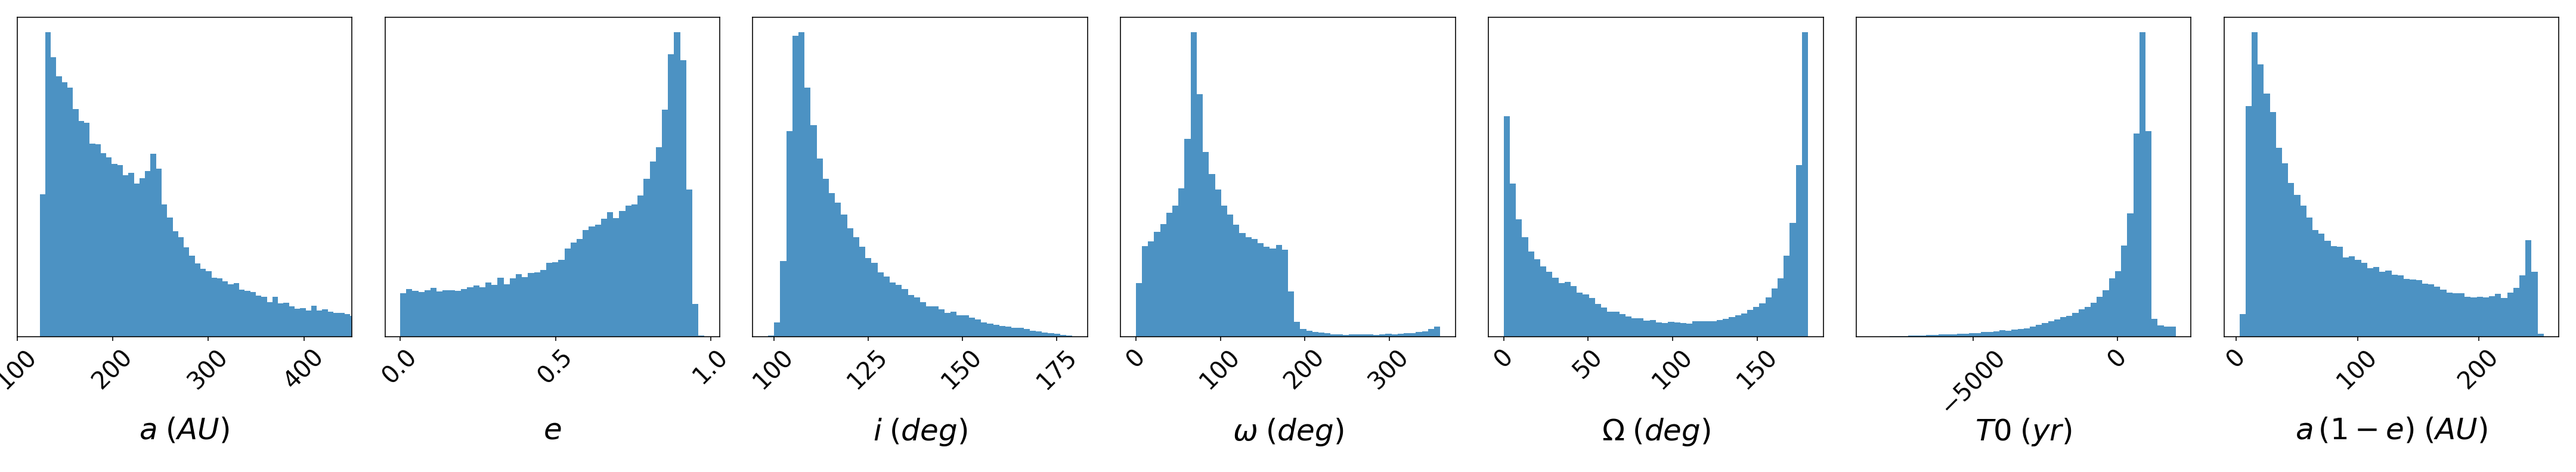

In [72]:
# Determine sigma levels:
levels = 1.0 - np.exp(-0.5 * np.arange(0.5, 2.1, 0.5) ** 2)
# Default color cycle:
#prop_cycle = plt.rcParams['axes.prop_cycle']
#colors = prop_cycle.by_key()['color']
colors=['black','black','black','black']
cmap = 'cubehelix_r'
cmap = 'binary'
tick_fs = 20
label_fs = 25
contour_lw = 1
contours = True
# Controls amount of smoothing:
sigma = 0.7
# Bin size fo 1d hists:
binsx=50
binsy=50
# Bin size for 2d hist:
binsxy = 40
# Label coords
label_x_x,label_x_y= 0.5,-0.25
label_y_x,label_y_y= -0.55,0.5

output_name = "GSC6214_ofti_output_2018_07_09/GSC6214_params_hists.pdf"


%matplotlib notebook
plt.figure(figsize=(30, 5.5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.0025, hspace=0.0025)

# Upper 1-d hist:
ax1 = plt.subplot2grid((1,7), (0,0))
plt.hist(a_au,bins=binsx*200,edgecolor='none',alpha=0.8)
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on', labelsize = tick_fs)
plt.xticks(rotation=45)
plt.xlim(100,450)
plt.xlabel(r"$a \; (AU)$",fontsize=label_fs)
ax1.get_xaxis().set_label_coords(label_x_x,label_x_y)
#plt.title(r"${{{0}}}={{{1}}}_{{-{2}}}^{{+{3}}}$".format('a',np.round(np.mean(a_au5),decimals=2),\
#                                                        np.round(np.std(a_au5),decimals=2), 
#           

ax2 = plt.subplot2grid((1,7), (0,1))
plt.hist(e5,bins=binsx,edgecolor='none',alpha=0.8)
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on', labelsize = tick_fs)
plt.xticks(rotation=45)
plt.xlabel(r"$e$",fontsize=label_fs)
ax2.get_xaxis().set_label_coords(label_x_x,label_x_y)

ax3 = plt.subplot2grid((1,7), (0,2))
plt.hist(i5_deg,bins=binsx,edgecolor='none',alpha=0.8)
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on', labelsize = tick_fs)
plt.xticks(rotation=45)
plt.xlabel(r"$ i \; (deg)$",fontsize=label_fs)
ax3.get_xaxis().set_label_coords(label_x_x,label_x_y)

ax4 = plt.subplot2grid((1,7), (0,3))
plt.hist(w5_deg,bins=binsx,edgecolor='none',alpha=0.8)
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on', labelsize = tick_fs)
plt.xticks(rotation=45)
plt.xlabel(r"$ \omega \; (deg)$",fontsize=label_fs)
ax4.get_xaxis().set_label_coords(label_x_x,label_x_y)

ax5 = plt.subplot2grid((1,7), (0,4))
plt.hist(O5_deg,bins=binsx,edgecolor='none',alpha=0.8)
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on', labelsize = tick_fs)
plt.xticks(rotation=45)
plt.xlabel(r"$\Omega \; (deg)$",fontsize=label_fs)
ax5.get_xaxis().set_label_coords(label_x_x,label_x_y)

ax6 = plt.subplot2grid((1,7), (0,5))
plt.hist(to5,bins=binsx,edgecolor='none',alpha=0.8)
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on', labelsize = tick_fs)
plt.xticks(rotation=45)
plt.xlabel(r"$T0 \; (yr)$",fontsize=label_fs)
ax6.get_xaxis().set_label_coords(label_x_x,label_x_y)

ax7 = plt.subplot2grid((1,7), (0,6))
plt.hist(peri5,bins=binsx,edgecolor='none',alpha=0.8)
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on', labelsize = tick_fs)
plt.xticks(rotation=45)
plt.xlabel(r"$a\,(1-e) \; (AU)$",fontsize=label_fs)
ax7.get_xaxis().set_label_coords(label_x_x,label_x_y)
        
plt.tight_layout()

plt.show()
plt.savefig(output_name, format='pdf')

## Plot Periastron on a log scale

<IPython.core.display.Javascript object>


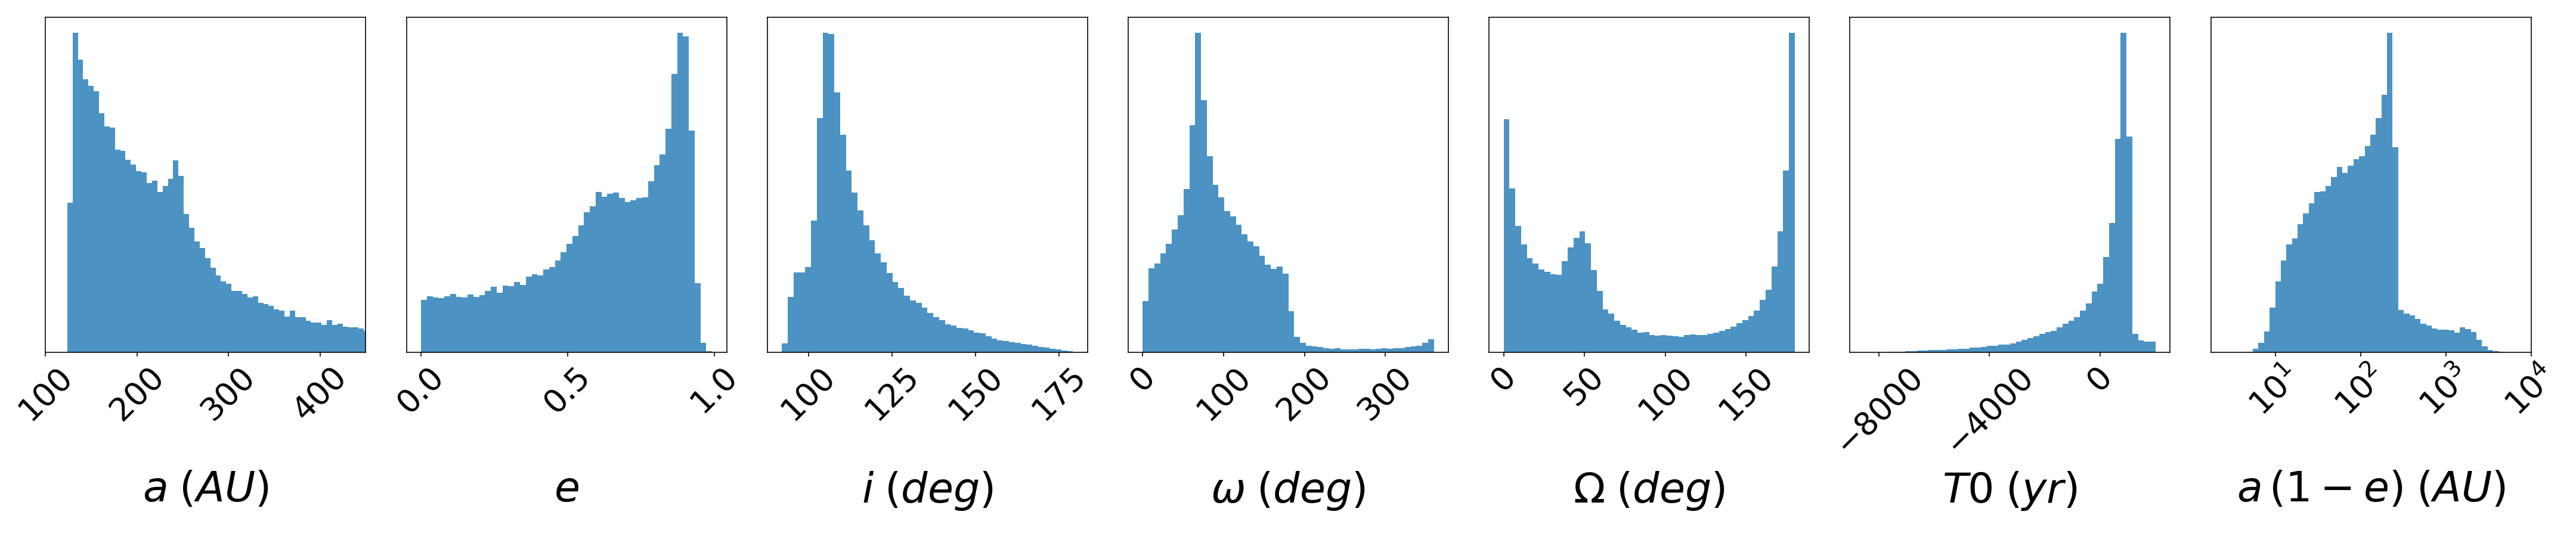

In [24]:

logperi5 = np.log10(peri5)
logperi = np.log10(periastron)

#Determine sigma levels:
levels = 1.0 - np.exp(-0.5 * np.arange(0.5, 2.1, 0.5) ** 2)
# Default color cycle:
#prop_cycle = plt.rcParams['axes.prop_cycle']
#colors = prop_cycle.by_key()['color']
colors=['black','black','black','black']
cmap = 'cubehelix_r'
cmap = 'binary'
tick_fs = 27
label_fs = 35
contour_lw = 1
contours = True
# Controls amount of smoothing:
sigma = 0.7
# Bin size fo 1d hists:
binsx=50
binsy=50
# Bin size for 2d hist:
binsxy = 40
# Label coords
label_x_x,label_x_y= 0.5,-0.35
label_y_x,label_y_y= -0.55,0.5

output_name = "GSC6214_ofti_output_2018_07_09/GSC6214_params_hists_logperi.pdf"


#%matplotlib notebook
plt.figure(figsize=(30, 6.5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.0025, hspace=0.0025)

ax1 = plt.subplot2grid((1,7), (0,0))
plt.hist(a_au,bins=binsx*200,edgecolor='none',alpha=0.8)
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on', labelsize = tick_fs)
plt.xticks(rotation=45)
plt.xlim(100,450)
ax1.xaxis.set_major_locator(ticker.MaxNLocator(4,prune="upper"))
plt.xlabel(r"$a \; (AU)$",fontsize=label_fs)
ax1.get_xaxis().set_label_coords(label_x_x,label_x_y)


ax2 = plt.subplot2grid((1,7), (0,1))
plt.hist(e,bins=binsx,edgecolor='none',alpha=0.8)
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on', labelsize = tick_fs)
plt.xticks(rotation=45)
plt.xlabel(r"$e$",fontsize=label_fs)
ax2.get_xaxis().set_label_coords(label_x_x,label_x_y)

ax3 = plt.subplot2grid((1,7), (0,2))
plt.hist(i_deg,bins=binsx,edgecolor='none',alpha=0.8)
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on', labelsize = tick_fs)
plt.xticks(rotation=45)
plt.xlabel(r"$ i \; (deg)$",fontsize=label_fs)
ax3.get_xaxis().set_label_coords(label_x_x,label_x_y)
ax3.xaxis.set_major_locator(ticker.MaxNLocator(4,prune="upper"))

ax4 = plt.subplot2grid((1,7), (0,3))
plt.hist(w_deg,bins=binsx,edgecolor='none',alpha=0.8)
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on', labelsize = tick_fs)
plt.xticks(rotation=45)
plt.xlabel(r"$ \omega \; (deg)$",fontsize=label_fs)
ax4.get_xaxis().set_label_coords(label_x_x,label_x_y)
ax4.xaxis.set_major_locator(ticker.MaxNLocator(4,prune="upper"))

ax5 = plt.subplot2grid((1,7), (0,4))
plt.hist(O_deg,bins=binsx,edgecolor='none',alpha=0.8)
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on', labelsize = tick_fs)
plt.xticks(rotation=45)
plt.xlabel(r"$\Omega \; (deg)$",fontsize=label_fs)
ax5.get_xaxis().set_label_coords(label_x_x,label_x_y)
ax5.xaxis.set_major_locator(ticker.MaxNLocator(4,prune="upper"))

ax6 = plt.subplot2grid((1,7), (0,5))
plt.hist(to5,bins=binsx,edgecolor='none',alpha=0.8)
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on', labelsize = tick_fs)
plt.xticks(rotation=45)
#plt.xlim(-5000,100)
plt.xlabel(r"$T0 \; (yr)$",fontsize=label_fs)
ax6.get_xaxis().set_label_coords(label_x_x,label_x_y)
ax6.xaxis.set_major_locator(ticker.MaxNLocator(3,prune="upper"))

ax7 = plt.subplot2grid((1,7), (0,6))
plt.hist(logperi,bins=binsx,edgecolor='none',alpha=0.8)
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on', labelsize = tick_fs)
plt.xticks(rotation=45)
plt.xlabel(r"$a\,(1-e) \; (AU)$",fontsize=label_fs)
plt.xticks([1,2,3,4],[r'$10^{1}$',r'$10^{2}$',r'$10^{3}$',r'$10^{4}$'])
ax7.get_xaxis().set_label_coords(label_x_x,label_x_y)
#ax7.xaxis.set_major_locator(ticker.MaxNLocator(4,prune="upper"))
#ax7.set_xscale("log", nonposx='clip')
        
plt.tight_layout()

plt.show()
plt.savefig(output_name, format='pdf')

<IPython.core.display.Javascript object>


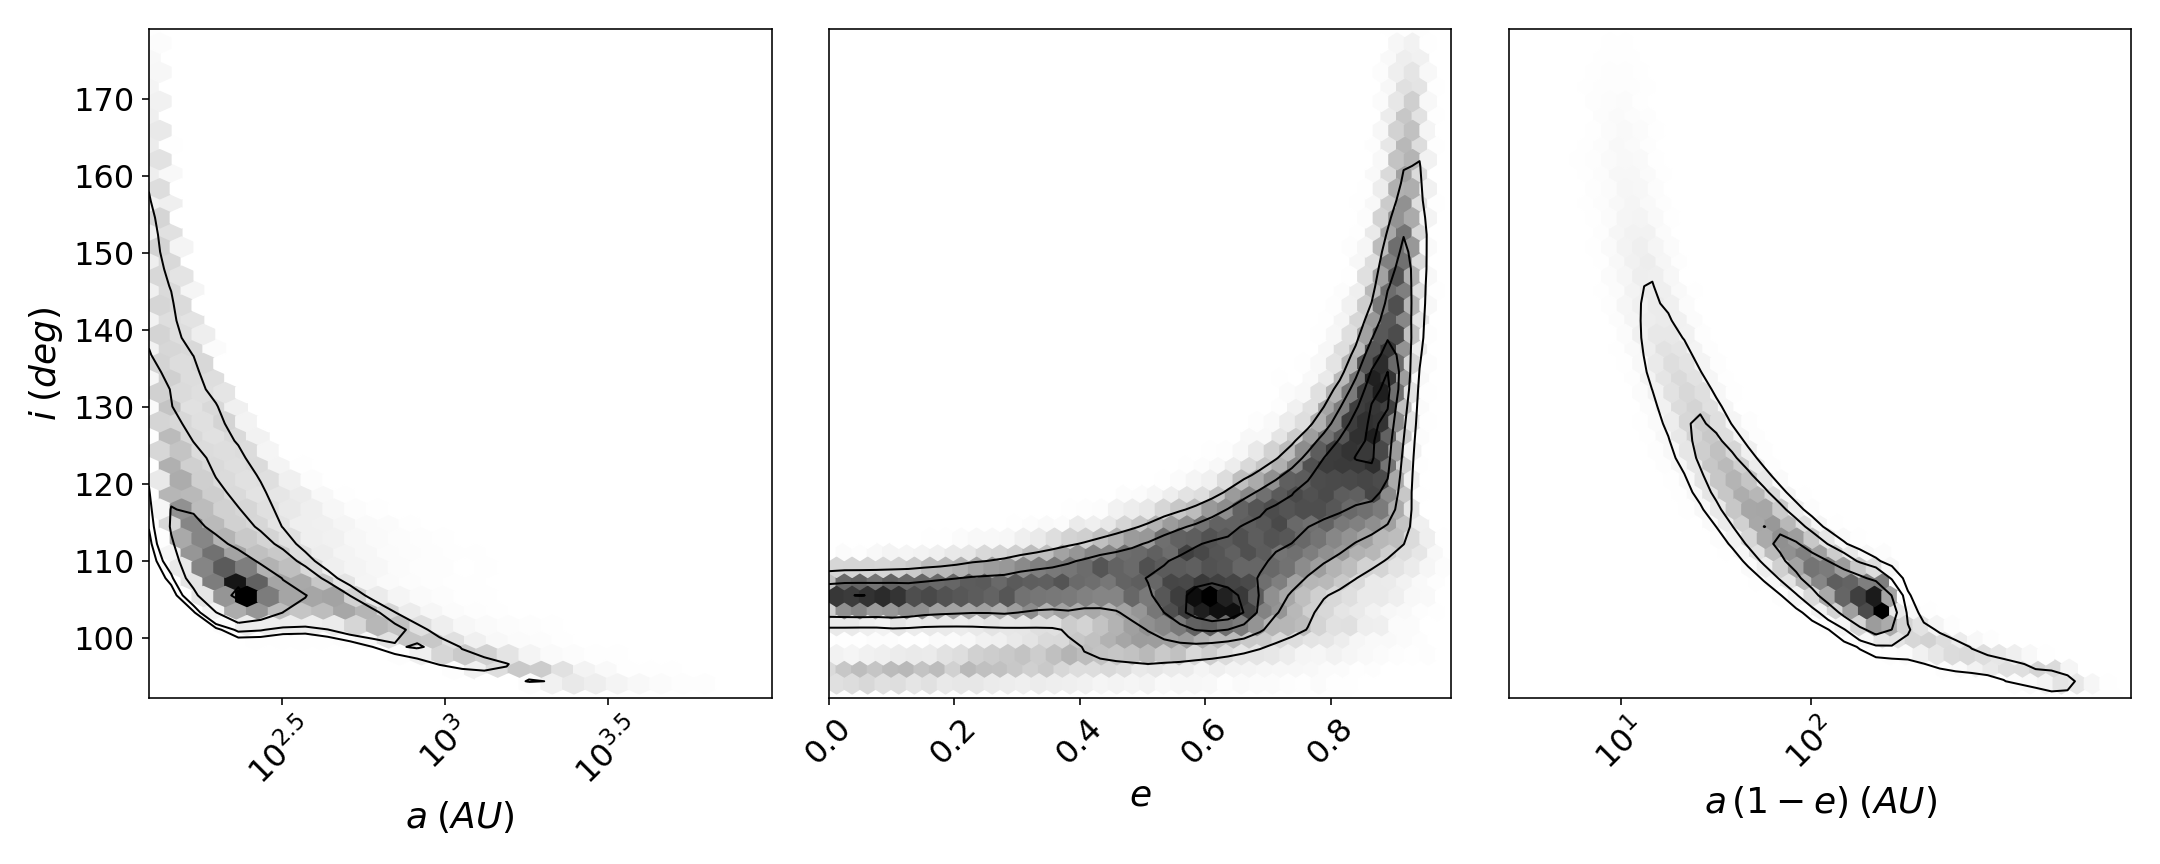

In [60]:
# Determine sigma levels:
levels = 1.0 - np.exp(-0.5 * np.arange(0.5, 2.1, 0.5) ** 2)
# Default color cycle:
#prop_cycle = plt.rcParams['axes.prop_cycle']
#colors = prop_cycle.by_key()['color']
colors=['black','black','black','black']
cmap = 'cubehelix_r'
cmap = 'binary'
tick_fs = 16
label_fs = 18
contour_lw = 1
contours = True
# Controls amount of smoothing:
sigma = 0.7
# Bin size fo 1d hists:
binsx=50
binsy=50
# Bin size for 2d hist:
binsxy = 40

################## Variables to plot #######################
x,y = peri5,i5_deg
ylabel = r"$i \; (deg)$"
xlabel = r"$a\,(1-e) \; (AU)$"
output_name = "GSC6214_ofti_output_2018_07_09/GSC6214_2dcontours_i_logperi.pdf"


%matplotlib notebook
plt.figure(figsize=(15, 6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.025, hspace=0.025)

# 2-d hist:
ax7 = plt.subplot2grid((1,3), (0,0))
plt.hexbin(np.log10(a_au),i_deg,gridsize=binsxy,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(np.log10(a_au),i_deg, bins=binsxy, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
ax7.xaxis.set_major_locator(ticker.MaxNLocator(4,prune="upper"))
plt.xticks(rotation=45)
plt.xlim(np.min(np.log10(a_au)),4)
plt.xticks([2.5,3,3.5],[r'$10^{2.5}$',r'$10^{3}$',r'$10^{3.5}$'])
plt.tick_params(axis='both', which='major', labelsize=tick_fs)
plt.ylabel(ylabel, fontsize=label_fs)
plt.xlabel(r"$a \; (AU)$",fontsize=label_fs)

# 2-d hist:
ax8 = plt.subplot2grid((1,3), (0,1),sharey=ax7)
plt.hexbin(e,i_deg,gridsize=binsxy,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(e,i_deg, bins=binsxy, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
ax8.xaxis.set_major_locator(ticker.MaxNLocator(5,prune="upper"))
plt.xticks(rotation=45)
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on', labelsize = tick_fs)
#plt.ylabel(ylabel, fontsize=label_fs)
plt.xlabel(r"$e$",fontsize=label_fs)

# 2-d hist:
ax9 = plt.subplot2grid((1,3), (0,2),sharey=ax7)
#plt.hexbin(logperi5,i5_deg,gridsize=binsxy,cmap=cmap,mincnt=1)
plt.hexbin(logperi,i_deg,gridsize=binsxy,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(logperi,i_deg, bins=binsxy, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
ax9.xaxis.set_major_locator(ticker.MaxNLocator(5,prune="upper"))
plt.xticks(rotation=45)
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on', labelsize = tick_fs)
#plt.ylabel(ylabel, fontsize=label_fs)
plt.xlabel(xlabel,fontsize=label_fs)
#plt.xlim(0,2.5)
plt.xticks([1,2],[r'$10^{1}$',r'$10^{2}$'])

plt.tight_layout()

plt.show()
plt.savefig(output_name, format='pdf', dpi=300)